<a href="https://colab.research.google.com/github/Gcango/Expl_Analise_dadosFuncionarios/blob/main/Exploara%C3%A7%C3%A3o_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste exercício, buscamos aprimorar nossas habilidades analíticas ao utilizar um conjunto de dados relacionados à educação. Nosso objetivo foi explorar diversos aspectos, incluindo:

a) Utilização da função isin para identificação de valores em determinados conjuntos.
b) Utilização da função between para selecionar registros dentro de um intervalo específico.
c) Utilização da função unique para identificar valores únicos dentro de uma série de dados.
d) Utilização da função dropna para remover registros com valores nulos.
e) Utilização da função replace para substituir valores específicos por outros desejados.
f) Utilização da função duplicated para identificar registros duplicados.
g) Utilização da função drop_duplicates para remover registros duplicados.
h) Utilização da função astype para converter o tipo de dados de uma série.
i) Utilização da função apply para aplicar uma função a elementos de uma série ou DataFrame.
j) Exploração do conceito de análise univariada, que consiste na análise de uma única variável em um conjunto de dados.
k) Exploração do conceito de análise bivariada, que envolve a análise da relação entre duas variáveis em um conjunto de dados.

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
dados = pd.read_csv("/content/adult.csv")

In [242]:
dados.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [243]:
#Explorando o Dataset

In [244]:
dados.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [245]:
print("Numero de linhas ", dados.shape[0])
print("Numero de Colunas ", dados.shape[1])

Numero de linhas  48842
Numero de Colunas  15


In [246]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [247]:
dados.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [248]:
#Definir uma amostra de 50% do conjunto de dados

In [249]:
df = dados.sample(frac=0.50, random_state=111)

In [250]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
31652,54,Local-gov,172991,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
20931,31,Private,73514,HS-grad,9,Never-married,Sales,Own-child,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K
38653,31,Private,416415,HS-grad,9,Separated,Adm-clerical,Not-in-family,White,Male,0,0,45,United-States,<=50K
32939,22,Private,203182,Bachelors,13,Never-married,Exec-managerial,Unmarried,White,Female,0,0,30,United-States,<=50K
17673,59,Private,226922,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,1762,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47522,60,Self-emp-not-inc,33717,11th,7,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
38727,45,Private,88061,11th,7,Married-spouse-absent,Machine-op-inspct,Unmarried,Asian-Pac-Islander,Female,0,0,40,South,<=50K
26925,43,Private,174325,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,<=50K
19894,24,Local-gov,117109,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,27,United-States,<=50K


In [251]:
#Verificando a Existência de Valores Nulos do Dataset

In [252]:
dados.isnull().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [253]:
#Saber a quantidade e a localização de ? nos dataset

In [254]:
dados.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [255]:
dados['workclass'] = dados['workclass'].replace('?', np.nan)
dados['occupation'] = dados['occupation'].replace('?', np.nan)
dados['native-country'] = dados['native-country'].replace('?', np.nan)

In [256]:
dados.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [257]:
#Verificando Novamente os Valores Nulos do Dataset visto que foram retirados e convertidos os ? em nan

In [258]:
dados.isnull().sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [259]:
#Verificar o impacto dos valores ausentes

In [260]:
por_eliminar = dados.isnull().sum() * 100 / len(dados)
por_eliminar

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [261]:
dados.dropna(how='any', inplace=True)

In [262]:
print("Numero de linhas ", dados.shape[0])
print("Numero de Colunas ", dados.shape[1])

Numero de linhas  45222
Numero de Colunas  15


In [263]:
print("Nesta atualização foram eliminados", 48842 - 45222, "linhas")

Nesta atualização foram eliminados 3620 linhas


In [264]:
#Verificação e eliminação dos Dados Duplicados

In [265]:
dados[dados.duplicated].count()

age                47
workclass          47
fnlwgt             47
education          47
educational-num    47
marital-status     47
occupation         47
relationship       47
race               47
gender             47
capital-gain       47
capital-loss       47
hours-per-week     47
native-country     47
income             47
dtype: int64

In [266]:
dados = dados.drop_duplicates()

In [267]:
print("Numero de linhas ", dados.shape[0])
print("Numero de Colunas ", dados.shape[1])

Numero de linhas  45175
Numero de Colunas  15


In [268]:
print("Num total forma eliminados no geral", 48842 - 45175, "linhas")

Num total forma eliminados no geral 3667 linhas


In [269]:
#Eliminação de colunas indiferentes

In [270]:
dados = dados.drop(['educational-num','capital-gain', 'capital-loss'], axis=1)

In [271]:
dados.shape[1]

12

In [272]:
#Rever a distribuição das idades no dataset

In [273]:
dados['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

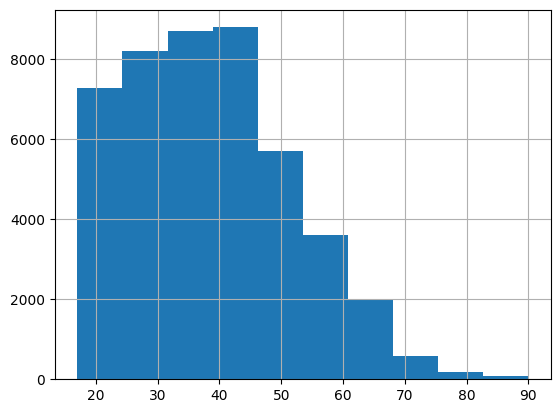

In [274]:
dados['age'].hist()

In [275]:
#Verificar o numero total de pessoas num intervalo de 17 a 49 anos.

In [276]:
pessoas_17_49 = sum(dados['age'].between(17,49))

In [277]:
print("Num total são", pessoas_17_49, "PESSOAS com idades compreendidas dos 17 aos 49 anos de idade")

Num total são 35666 PESSOAS com idades compreendidas dos 17 aos 49 anos de idade


In [278]:
#Verificar a Classe de trabalho

In [279]:
dados['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

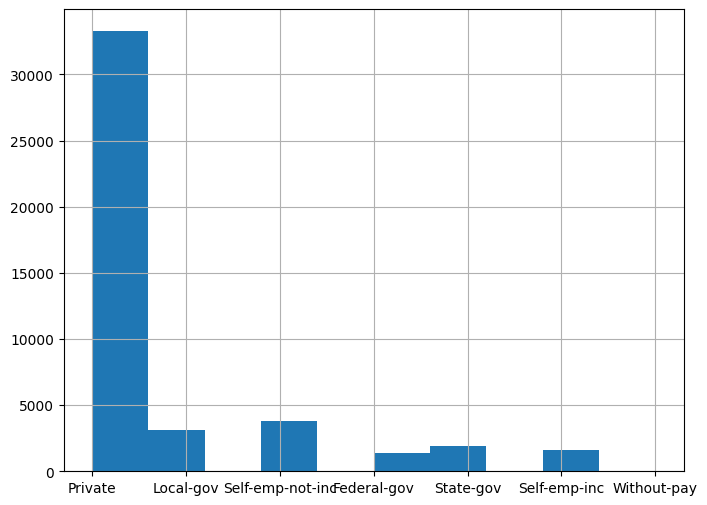

In [280]:
plt.figure(figsize=(8,6))
dados['workclass'].hist();

In [281]:
#Verificando o Grau académico (Mestrado ou Bacharelato) nos dados

In [282]:
dados['education'].value_counts()

HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64

In [283]:
bachareis = dados[dados['education'] == 'Bachelors']
mestres = dados[dados['education'] == 'Masters']

In [284]:
print("Este dataset conta com um total de", len(bachareis), "BACHAREIS na classe educação")
print("Também conta com um total de", len(mestres), "MESTRES")

Este dataset conta com um total de 7559 BACHAREIS na classe educação
Também conta com um total de 2513 MESTRES


In [285]:
#Analisando relação das variavel salario(income) com a idade(age)

<ipython-input-286-8036f06bcddc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=dados, palette="tab10");


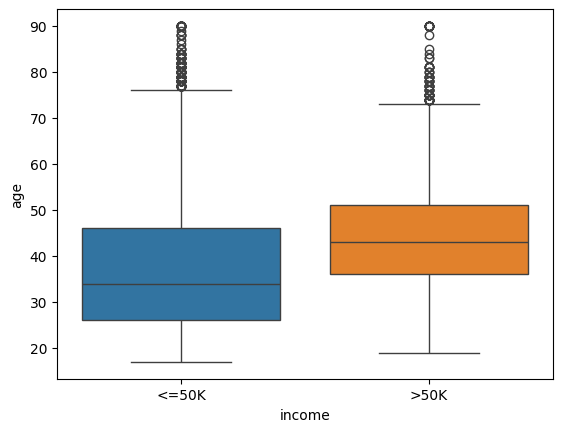

In [286]:
sns.boxplot(x='income', y='age', data=dados, palette="tab10");

In [287]:
#Verificando a coluna salário e encontrando um meio termo para unificar os valores

In [288]:
dados['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [289]:
dados['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [296]:
def dados_salario(sal):
  if sal == '<=50K':
    return 0
  else:
    return 1

In [297]:
dados['sumary_salary'] = dados['income'].apply(dados_salario)

In [298]:
dados.sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,sumary_salary
8964,42,Private,231832,Some-college,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,45,United-States,>50K,1
6686,61,Private,161472,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,1
4310,39,Private,175232,Bachelors,Divorced,Sales,Not-in-family,White,Male,40,United-States,<=50K,0
38696,23,State-gov,173945,Bachelors,Never-married,Prof-specialty,Own-child,White,Female,27,United-States,<=50K,0
27720,23,Private,121650,5th-6th,Never-married,Handlers-cleaners,Unmarried,White,Male,30,United-States,<=50K,0
33431,36,Private,272090,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,45,El-Salvador,<=50K,0
31511,54,Private,28518,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,50,United-States,>50K,1
4169,26,Private,157617,Bachelors,Never-married,Sales,Own-child,White,Male,45,United-States,<=50K,0
33525,54,Local-gov,152540,Some-college,Divorced,Craft-repair,Unmarried,White,Male,42,United-States,<=50K,0
7054,77,Self-emp-not-inc,161552,Preschool,Widowed,Exec-managerial,Not-in-family,White,Female,60,United-States,<=50K,0


In [299]:
dados['sumary_salary'].value_counts()

0    33973
1    11202
Name: sumary_salary, dtype: int64

In [300]:
dados.replace(to_replace=['<=50K', '>50K'], value=[0,1], inplace=True)

In [301]:
dados.sample(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,sumary_salary
19928,53,Private,166386,Bachelors,Married-civ-spouse,Machine-op-inspct,Wife,Asian-Pac-Islander,Female,40,China,0,0
21974,40,Private,342164,HS-grad,Separated,Adm-clerical,Unmarried,White,Female,37,United-States,0,0
18684,57,Private,346963,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1,1
20150,49,Private,107425,Masters,Never-married,Sales,Not-in-family,White,Female,35,United-States,0,0
9195,46,State-gov,76075,Assoc-voc,Divorced,Adm-clerical,Own-child,White,Female,20,United-States,0,0


In [ ]:
#Verifcar a classe de trabalho com os salarios mais altos

In [303]:
dados.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

In [ ]:
#Verificação da média de Salarios quanto aos Generos

In [305]:
dados.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64

In [307]:
dados['gender'].value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64